In [70]:
import torch 
import torch.nn as nn
import torchaudio
import librosa
import numpy as np
from matplotlib import pyplot as plt
from model import SingleExtractor

In [2]:
device = torch.device(0)

In [15]:
data, sample_rate = torchaudio.load('../Data/MTAT/the_marginal_prophets-bohemian_rap_cd-01-beatloaf-0-29.wav')


In [9]:
data.shape[1]/sample_rate

29.124

In [14]:
data1, sample_rate1 = librosa.load('../Data/MTAT/the_marginal_prophets-bohemian_rap_cd-01-beatloaf-0-29.wav', sr=16000)

In [68]:
S = torchaudio.transforms.Spectrogram(n_fft=513, hop_length=513//4, power=1)
spe = S(data)
spe.shape

torch.Size([1, 257, 3641])

In [29]:
spe1 = librosa.core.stft(data1, n_fft=513)
spe1.shape

(257, 3641)

In [31]:
D = librosa.stft(data1, n_fft=513)
spe2, phase = librosa.magphase(D)
spe2.shape

(257, 3641)

In [39]:
print (spe.dtype)
print (spe1.dtype)
print (spe2.dtype)

torch.float32
complex64
float32


In [46]:
from librosa.display import specshow

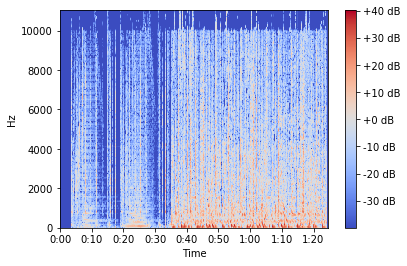

In [69]:
spe0 = spe[0].numpy()
specshow(librosa.amplitude_to_db(abs(spe0)), x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

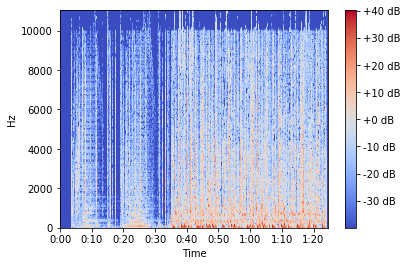

In [56]:
specshow(librosa.amplitude_to_db(spe2), x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [91]:
spe = np.load('../Data/spectrogram_pos/0_the_bots-now_is_the_time-12-the_secret_of_life-30-59_17.75.npy')

In [100]:
spee = np.load('../Data/spectrogram_pos/57_the_marginal_prophets-bohemian_rap_cd-07-spank_you-117-146_0.98.npy')

In [92]:
spe = torch.tensor(spe).unsqueeze(0).to(device)

In [96]:
ext = SingleExtractor(learn_bw='only_Q').to(device)

In [97]:
x = ext(spe)

In [101]:
spee = torch.tensor(spee).unsqueeze(0).to(device)

In [98]:
x

tensor([[7.2578e-01, 8.7109e-01, 5.4366e-02, 6.1611e-03, 1.9621e-02, 6.4397e-01,
         9.6324e-01, 4.4858e-02, 3.1748e-02, 5.3778e-01, 3.4751e-01, 2.5787e-01,
         7.2788e-01, 2.6817e-01, 3.3815e-01, 1.6395e-01, 1.4709e-01, 1.0336e-01,
         8.0201e-01, 8.3110e-01, 7.8658e-01, 5.2864e-01, 7.8155e-01, 8.2931e-01,
         3.5573e-01, 2.3074e-01, 3.1331e-01, 2.1720e-01, 6.2913e-03, 4.9849e-01,
         5.3208e-02, 9.6060e-01, 8.6428e-01, 8.3473e-01, 8.2017e-01, 1.7824e-02,
         7.8824e-01, 6.7881e-03, 4.5779e-01, 9.2597e-01, 9.6975e-01, 8.5445e-01,
         5.2949e-01, 6.3632e-02, 5.7768e-02, 7.4357e-01, 7.7408e-02, 2.9310e-02,
         8.0205e-01, 9.4341e-01, 4.3433e-02, 3.0264e-01, 8.3329e-01, 5.1952e-02,
         5.4715e-02, 2.8158e-02, 2.9394e-01, 9.9971e-02, 2.8501e-01, 9.9129e-01,
         1.2674e-01, 1.1259e-01, 4.0198e-01, 8.6646e-01, 6.3179e-01, 6.5180e-02,
         8.2239e-04, 3.5136e-02, 2.7764e-01, 9.0896e-01, 5.8961e-01, 3.9973e-01,
         9.7820e-01, 9.8484e

In [102]:
xx = ext(spee)

In [104]:
xx.device

device(type='cuda', index=0)